In [1]:
import pandas as pd
from ztfrapid.ztf_rapid import plot_raw_lightcurve
import cesium.featurize as featurize
from cesium.time_series import TimeSeries
from FATS.Feature import FeatureSpace
import numpy as np
from tsfresh import extract_features
import light_curve

You will need to install 'emcee' if you wish to train your own classifier on new data.


In [2]:
lc_data = pd.read_pickle('/home/nmiranda/workspace/ztf_rapid/data/raw/rcf_marshallc_sncosmo_200114_2018classupdate_addedcv.pkl')

ZTF19abpidqn
403
{'p48g', 'p48r', 'uvotu', 'uvm2', 'uvotv', 'uvotb', 'uvw1', 'uvw2'}


<AxesSubplot:title={'center':'ZTFID: ZTF19abpidqn, Type: SN IIn'}, xlabel='Time (MJD)', ylabel='Flux'>

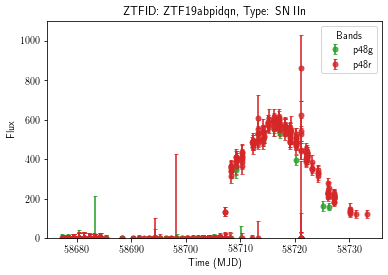

In [3]:
# idx = 5
# ztfid = list(lc_data.keys())[idx]
ztfid = 'ZTF19abpidqn'
lc = lc_data[ztfid]
print(ztfid)
print(len(lc))
print(set(lc['band']))
plot_raw_lightcurve(lc)

# Numpy

In [50]:
this_lc = lc[lc['band'] == 'p48g']
print(np.std(this_lc['flux'], ddof=0))
print(np.std(this_lc['flux'], ddof=1))

168.5278205272246
170.8524520026375


# Cesium

In [4]:
# pbnames = set(lc['band'])
# print(pbnames)
pbnames = ['p48g', 'p48r']

pbind = [(lc['band'] == pb) for pb in pbnames]
t = [lc['mjd'][mask].data for mask in pbind ]
m = [lc['flux'][mask].data for mask in pbind]
e = [lc['fluxerr'][mask].data for mask in pbind ]
target = lc.meta['classification']
try:
    this_z = lc['z']
except KeyError:
    this_z = None
try:
    this_mwevb = lc['mwebv']
except KeyError:
    this_mwebv = None

meta = {'z':this_z,\
        'mwebv':this_mwebv}

tsobj = TimeSeries(t=t, m=m, e=e,label=target, name=ztfid, meta_features=meta,channel_names=pbnames )

In [5]:
features_to_use = ["std"]
thisfeats = featurize.featurize_single_ts(tsobj, features_to_use=features_to_use, raise_exceptions=False)
thisfeats

/home/nmiranda/miniconda3/envs/ztf_rapid/lib/python3.6/site-packages/cesium/features/scatter_res_raw.py:14: RuntimeWarning: divide by zero encountered in double_scalars
  cf.median_absolute_deviation(m))
/home/nmiranda/miniconda3/envs/ztf_rapid/lib/python3.6/site-packages/cesium/features/period_folding.py:88: RuntimeWarning: invalid value encountered in double_scalars
  out_dict['scatter_over_mad'] = median_diff / mad
/home/nmiranda/miniconda3/envs/ztf_rapid/lib/python3.6/site-packages/cesium/features/period_folding.py:91: RuntimeWarning: invalid value encountered in double_scalars
  out_dict['scatter_pfold_over_mad'] = median_1per_fold_diff / mad
/home/nmiranda/miniconda3/envs/ztf_rapid/lib/python3.6/site-packages/cesium/features/cadence_features.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return (cads[2:] + cads[:-2]) / (cads[1:-1] - cads[:-2])
/home/nmiranda/miniconda3/envs/ztf_rapid/lib/python3.6/site-packages/numpy/core/_methods.py:202: RuntimeWarning: inval

feature  channel
std      0          168.527821
         1          243.861664
dtype: float64

# FATS

In [6]:
this_lc = lc[lc['band'] == 'p48g']
fields = [
    this_lc['flux'], 
    this_lc['mjd'], 
    this_lc['fluxerr']
    ]

feature_space = FeatureSpace(featureList=["Std"])
feature_space = feature_space.calculateFeature(np.array(fields))
feature_space.result()

array([168.52782053])

# TSFresh

In [7]:
lc_df = lc.to_pandas().reset_index(drop=True)
lc_df['id'] = ztfid
lc_df = lc_df[lc_df['band'] == 'p48g']

fc_parameters = {
    "standard_deviation": None,
}
extract_features(lc_df, column_id="id", column_sort="mjd", column_value='flux', n_jobs=0, default_fc_parameters=fc_parameters)

Feature Extraction: 100%|██████████| 1/1 [00:00<00:00, 483.16it/s]


,flux__standard_deviation
ZTF19abpidqn,168.527821


# light-curve-python

In [8]:
features = {'StandardDeviation': None}
light_curve.StandardDeviation?

In [56]:
this_lc = lc[lc['band'] == 'p48g']
light_curve.StandardDeviation()(t=this_lc['mjd'], m=this_lc['flux'])

array([170.852452])